In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

from data_load import *
from model_fit_functions import *

from sklearn.utils import shuffle

import pandas as pd
import numpy as np

import pickle

import random
from sklearn.metrics.pairwise import euclidean_distances

import numpy as np
from sklearn.decomposition import PCA

In [4]:
# Load data
data_dict =  load_split_pool(1346, 430, 10, scale = True)

# Pooled X data
train_df_pooled = data_dict["x_pooled"]["train"]
val_df_pooled = data_dict["x_pooled"]["val"]

Directory: Complete_Spectral_Data\Training_Data Physical properties shape: (1346, 5) Spectral prop shape: (1346, 110001)
Directory: Complete_Spectral_Data\Test_Data Physical properties shape: (810, 5) Spectral prop shape: (810, 110001)
Spectral data shape (2156, 110001)
Physical data shape (2156, 5)


In [5]:
data_dict.keys()

dict_keys(['x', 'x_pooled', 'y', 'parameters', 'wavelengths'])

## Load estimated models from pickled objects

In [6]:
# Autoencoder

# file = open('outputs/spca_results_5.txt','rb')
file = open('outputs/simple_autoencoder_loss','rb')
autoenc_simple = pickle.load(file)
file.close()

# Sparse PCA (the number in the filename is lambda regularisation parameter )

# lambda = 7
file = open('outputs/spca_results7_new.txt','rb')
spca_alpha7 = pickle.load(file)
file.close()

# lambda = 5
file = open('outputs/spca_results5_new.txt','rb')
spca_alpha5 = pickle.load(file)
file.close()

# lambda = 4.5
file = open('outputs/spca_results45_new.txt','rb')
spca_alpha45 = pickle.load(file)
file.close()

# lambda = 3.5
file = open('outputs/spca_results35_new.txt','rb')
spca_alpha35 = pickle.load(file)
file.close()

# lambda = 2.5
file = open('outputs/spca_results_025_new.txt','rb')
spca_alpha35 = pickle.load(file)
file.close()

# lambda = 1
file = open('outputs/spca_results_01.txt','rb')
spca_alpha1 = pickle.load(file)
file.close()

# lambda = 0 (same as PCA)
file = open('outputs/spca_results00_new.txt','rb')
spca_alpha00 = pickle.load(file)
file.close()

# lambda = 2.5 plus change ridge penalty - this has no effect on the estimates so not used here
file = open("outputs/spca_results_25_100_ridge_new_small.txt",'rb')
spca_alpha25 = pickle.load(file)
file.close()

# Random projections (two different objects, one fitted to a finer grid of n_components,
# another one for a coarser but longer grid to check convergence properties)

file = open('outputs/randomproj_sequence_long','rb')
spca_randp_long = pickle.load(file)
file.close()

file = open('outputs/randomproj_sequence','rb')
spca_randp = pickle.load(file)
file.close()

file = open('outputs/pca_tau_loss','rb')
pca_tau_loss = pickle.load(file)
file.close()

file = open('outputs/pca','rb')
pca = pickle.load(file)
file.close()

file = open('outputs/pca_trim','rb')
pca_trim = pickle.load(file)
file.close()

file = open('outputs/simple_autoenc_object','rb')
autoencoder = pickle.load(file)
file.close()
# "simple_autoenc_object"

file = open('outputs/simple_autoencoder_loss_finegrid','rb')
autoenc_simple_fineg = pickle.load(file)
file.close()

file = open('outputs/6layer_autoencoder_loss_finegrid','rb')
autoenc_6layer_fineg = pickle.load(file)
file.close()


import tensorflow as tf
file = open('outputs/simple_autoenc_object','rb')
simple_autoenc_object = pickle.load(file)
file.close()

C:\Users\jbryb\gsof_env\lib\site-packages\sklearn\base.py:310: UserWarning: Trying to unpickle estimator SparsePCA from version 0.22.2.post1 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


In [7]:

# We need to calculate reconstr loss for sparse PCA as this is not contained in the loaded objects

def rescale_back(observation, mean, std):
    '''
    Reverse standardisation using the given parameters
    '''
    return( observation*std + mean ) 



### Different loss?

In [8]:
pca_loss = [ pca["restricted_spaces"][i]["loss"] for i in pca["restricted_spaces"] ]
pca_trim_loss = [ pca_trim["restricted_spaces"][i]["loss"] for i in pca_trim["restricted_spaces"] ]

In [9]:
# loss_pca, val_projected_pca, val_original_space_proj_pca = calculate_reconstr_loss_pca_2(pca, val_df_pooled, n_comp,
#                              rescale = True,
#                              mean = data_dict["parameters"]["mean"],
#                              std = data_dict["parameters"]["std"])

In [10]:
val_df_pooled_rescaled = rescale_back(val_df_pooled, data_dict["parameters"]["mean"], data_dict["parameters"]["std"]) 

In [12]:
# mean_abserror = np.abs(val_df_pooled_rescaled - val_original_space_proj_pca).mean(axis = 0)
# std_abserror = np.abs(val_df_pooled_rescaled - val_original_space_proj_pca).std(axis = 0)

# fig, ax = plt.subplots()
# ax.plot(mean_abserror)
# # ax.plot(mean_abserror  - std_abserror)
# ax.plot(mean_abserror  + std_abserror)

# Error analysis: PCA & AE

In [13]:
pca["restricted_spaces"][50]['x_val_original_space_pca']
pca["restricted_spaces"][50]['x_val_transformed']

0          1          2          3          4          5   \
0   -15.076873   2.448163   3.716576   2.018882  -3.720721   0.580731   
1   -14.066830   4.080055   3.626992   0.462648  -1.532239  -0.299640   
2   -14.783154   0.550526   4.133442   4.219953  -1.149172   0.236056   
3     5.796484  24.731467   4.950076 -12.229290  26.631918  21.936035   
4   -11.261991   0.308087  -4.769997   5.816045  -8.055499   0.590504   
..         ...        ...        ...        ...        ...        ...   
425  -9.674879  -2.611227  -1.994344   6.930977  -2.470977   3.923091   
426  -6.941800   7.818169  11.088835   8.857639  -6.315954  -1.268275   
427  -9.838419  -4.437916  -0.147373   7.999600   2.704357   3.730630   
428   0.905412 -17.632266   9.899919   1.654283  16.669629 -14.110559   
429 -14.614737   1.596500   4.678476   2.823713  -2.740723   0.265968   

            6         7          8         9   ...        40        41  \
0     0.741543  0.866253  -2.289694  6.249714  ...  0.421238  0.018583   
1     0.408867 -0.762650  -1.119766  8.120512  ...  0.988540  1.391804   
2     0.588819  0.234529  -2.901523  5.963927  ... -0.867485 -1.869010   
3   -19.385968  8.673986  -1.601051 -9.898910  ...  2.008667  0.750099   
4    -2.494858 -1.293860   1.994690 -0.548558  ...  4.037277 -0.889090   
..         ...       ...        ...       ...  ...       ...       ...   
425  -1.829065 -1.997169   3.448540 -0.007566  ...  1.069525  1.839589   
426   3.614851 -1.201642  -0.042912  2.118213  ...  1.624085  3.332543   
427   1.323119 -3.162922   1.225813  1.000305  ...  0.106373 -0.372093   
428  10.120394  7.469919 -13.920293 -8.524821  ...  5.185579 -7.013910   
429   0.028231  0.326555  -3.962376  6.846498  ... -0.779657 -0.367435   

           42        43        44        45        46        47        48  \
0   -2.602240 -0.140874 -0.200229  1.266680 -0.193058  1.274533  1.555715   
1   -0.794841 -0.039715 -0.110490 -1.175103  2.064692 -1.079251  1.240994   
2    0.700633 -0.890699  0.305357  0.868340  1.607609 -1.614601  0.960905   
3    4.567771 -7.405482 -0.135641 -0.554292 -1.718111 -0.057667  1.278533   
4    2.492560 -5.289865 -3.557421 -1.660407 -1.909832  1.038155  0.250040   
..        ...       ...       ...       ...       ...       ...       ...   
425 -0.568816 -0.585837 -0.248002  1.394613 -0.629568 -0.607232 -0.602597   
426  0.581080  0.847918 -1.429698  1.122612 -0.969163 -0.969130  0.455206   
427 -0.869347  0.134411  0.863563 -0.161542 -1.537727  0.932354 -0.254862   
428 -3.901128  2.281258 -0.729443 -1.514765 -0.443075  2.300814 -0.892758   
429  0.835032 -0.650386 -0.372056 -0.737849  0.338069 -0.391505  0.225237   

           49  
0    0.353367  
1   -0.140407  
2    0.189411  
3    0.774914  
4    2.374399  
..        ...  
425 -1.501278  
426  1.917196  
427 -0.358531  
428  3.038155  
429  0.368024  

[430 rows x 50 columns]

In [14]:
def rescale_back(observation, mean, std):
    '''
    Reverse standardisation using the given parameters
    '''
    return( observation*std + mean ) 

In [15]:
val_df_pooled_rescaled = rescale_back(val_df_pooled, data_dict["parameters"]["mean"], data_dict["parameters"]["std"]) 

pca_val_transformed = pca["restricted_spaces"][50]['x_val_transformed']
pca_val_transformed_origspace = pca["restricted_spaces"][50]['x_val_original_space_pca']

pca_errors = (val_df_pooled_rescaled - pca_val_transformed_origspace).to_numpy() 

In [16]:
    
autoenc_errors = val_df_pooled_rescaled - rescale_back(autoencoder["x_reconstructed_val"], 
                                                     data_dict["parameters"]["mean"], 
                                                     data_dict["parameters"]["std"])

In [17]:

pca_errors = (val_df_pooled_rescaled - pca_val_transformed_origspace).to_numpy() 

In [18]:
# load physical data

phys_var_cols = ['virial_rad', 'stellar_rad', 'impact', 'mass', 'disc']
phys_val = pd.DataFrame(data_dict["y"]["val"])
phys_val.columns = phys_var_cols 
phys_val.drop("mass", axis = 1, inplace = True)

# phys_val[["virial_rad", "stellar_rad"]] = np.log10(phys_val[["virial_rad", "stellar_rad"]])
phys_val.head()

scaler_y = StandardScaler()
phys_val_std = scaler_y.fit_transform(phys_val)

pca_errors_means = pca_errors.mean(axis = 1)
pca_errors_means_std = (pca_errors_means - pca_errors_means.mean())/pca_errors_means.std() 

In [19]:
pca_dims = np.array( list( pca["restricted_spaces"].keys() ) )
pca_dims

array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34,
       36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68,
       70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98])

In [20]:
pca_loss = [ pca["restricted_spaces"][i]["loss"] for i in pca["restricted_spaces"] ]
pca_trim_loss = [ pca_trim["restricted_spaces"][i]["loss"] for i in pca_trim["restricted_spaces"] ]

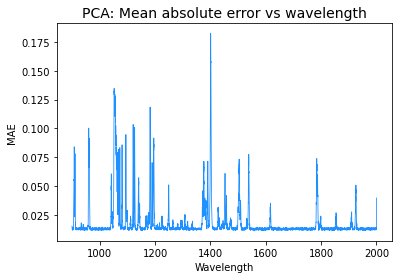

In [21]:
pca_mean_abserror = np.abs(pca_errors).mean(axis = 0)
pca_std_abserror = pca_mean_abserror.std(axis = 0)

fig, ax = plt.subplots()
ax.plot(data_dict["wavelengths"], pca_mean_abserror, color = "dodgerblue", linewidth = 0.8)
ax.set_xlabel("Wavelength")
ax.set_ylabel("MAE")
ax.set_title("PCA: Mean absolute error vs wavelength", fontsize = 14);

Text(0.5, 0, 'Wavelength')

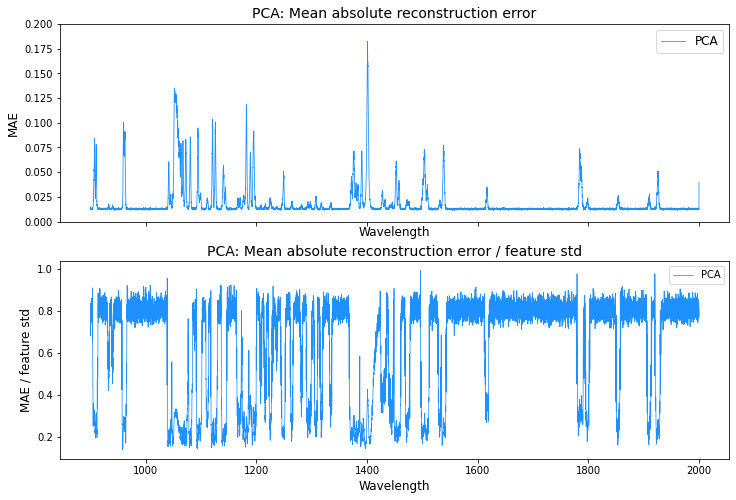

In [22]:
# fig, ax = plt.subplots(figsize = (10, 6))

fig, ax = plt.subplots( 2, 1, sharex = True, figsize = (12, 8) )
ax[0].plot(data_dict["wavelengths"], pca_mean_abserror, color = "dodgerblue", linewidth = 0.8, label = "PCA")
ax[0].legend(fontsize = 12)
ax[0].set_xlabel("Wavelength", fontsize = 12)
ax[0].set_ylabel("MAE", fontsize = 12)
ax[0].set_ylim([0, 0.2])
ax[0].set_title("PCA: Mean absolute reconstruction error", fontsize = 14)
# ax.plot(mean_abserror/mean_abserror.max())
ax[1].plot(data_dict["wavelengths"], pca_mean_abserror/data_dict["parameters"]["std"], linewidth=0.75, color = "dodgerblue", label = "PCA" )
ax[1].legend()
ax[1].set_title("PCA: Mean absolute reconstruction error / feature std", fontsize = 14)
ax[1].set_ylabel("MAE / feature std", fontsize = 12)
ax[1].set_xlabel("Wavelength", fontsize = 12)

Text(0.5, 0, 'Wavelength')

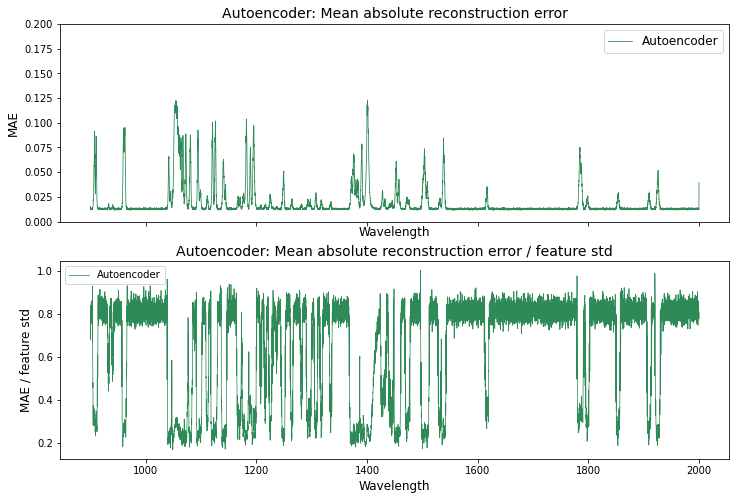

In [23]:
# fig, ax = plt.subplots(figsize = (10, 6))

fig, ax = plt.subplots( 2, 1, sharex = True, figsize = (12, 8) )
ax[0].plot(data_dict["wavelengths"], np.abs(autoenc_errors).mean(axis = 0), color = "seagreen", linewidth = 0.8, label = "Autoencoder")
ax[0].legend(fontsize = 12)
ax[0].set_xlabel("Wavelength", fontsize = 12)
ax[0].set_ylabel("MAE", fontsize = 12)
ax[0].set_ylim([0, 0.2])
ax[0].set_title("Autoencoder: Mean absolute reconstruction error", fontsize = 14)
# ax.plot(mean_abserror/mean_abserror.max())
ax[1].plot(data_dict["wavelengths"], np.abs(autoenc_errors).mean(axis = 0)/data_dict["parameters"]["std"], linewidth=0.75, 
           color = "seagreen", label = "Autoencoder" )
ax[1].legend()
ax[1].set_title("Autoencoder: Mean absolute reconstruction error / feature std", fontsize = 14)
ax[1].set_ylabel("MAE / feature std", fontsize = 12)
ax[1].set_xlabel("Wavelength", fontsize = 12)

Text(0.5, 0, 'Wavelength')

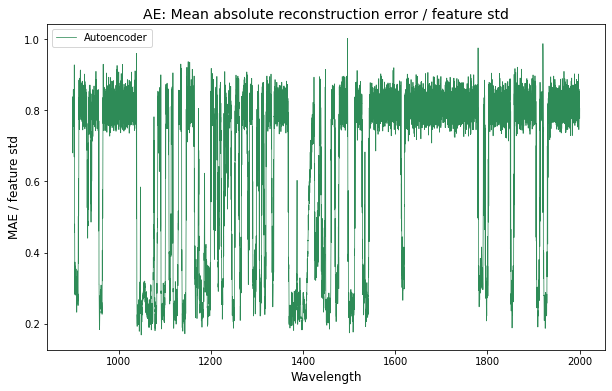

In [24]:
fig, ax = plt.subplots(figsize = (10, 6))
# ax.plot(mean_abserror/mean_abserror.max())
ax.plot(data_dict["wavelengths"], np.abs(autoenc_errors).mean(axis = 0)/data_dict["parameters"]["std"], color="seagreen", 
        linewidth=0.75, 
        label = "Autoencoder" )
ax.legend()
ax.set_title("AE: Mean absolute reconstruction error / feature std", fontsize = 14)
ax.set_ylabel("MAE / feature std", fontsize = 12)
ax.set_xlabel("Wavelength", fontsize = 12)

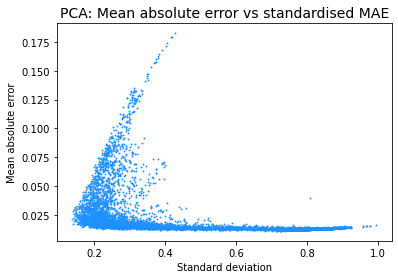

In [25]:
fig, ax = plt.subplots()
ax.scatter( pca_mean_abserror/data_dict["parameters"]["std"], pca_mean_abserror, s = 0.8, c = "dodgerblue" )
ax.set_xlabel("Standard deviation")
ax.set_ylabel("Mean absolute error")
ax.set_title("PCA: Mean absolute error vs standardised MAE", fontsize = 14);

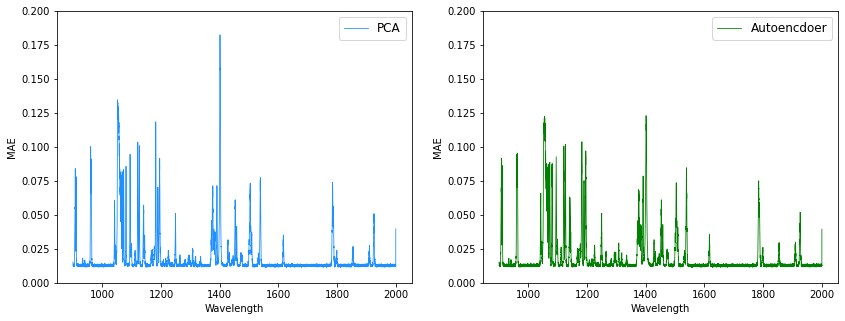

In [26]:
fig, ax = plt.subplots( 1, 2, sharex = True, figsize = (14, 5) )
ax[0].plot(data_dict["wavelengths"], pca_mean_abserror, color = "dodgerblue", linewidth = 0.8, label = "PCA")
ax[0].legend(fontsize = 12)
ax[0].set_xlabel("Wavelength")
ax[0].set_ylabel("MAE")
ax[0].set_ylim([0, 0.2])
# ax[0].set_title("PCA: Mean absolute error vs wavelength", fontsize = 14);
ax[1].plot(data_dict["wavelengths"], np.abs(autoenc_errors).mean(axis = 0), linewidth = 0.8, color = "green", label = "Autoencdoer" )
ax[1].legend(fontsize = 12)
ax[1].set_xlabel("Wavelength")
ax[1].set_ylim([0, 0.2])
ax[1].set_ylabel("MAE");

(0.0, 0.2)

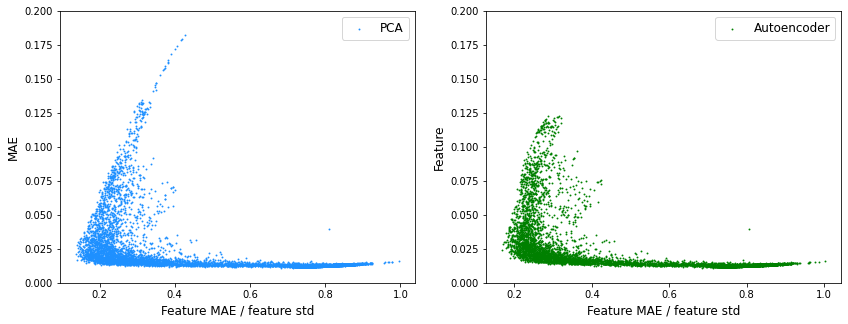

In [27]:
fig, ax = plt.subplots(1, 2, figsize = (14, 5) )
ax[0].scatter( pca_mean_abserror/data_dict["parameters"]["std"], pca_mean_abserror, s = 0.8, c = "dodgerblue", label = "PCA" )
ax[0].set_xlabel("Feature MAE / feature std", fontsize = 12)
ax[0].set_ylabel("MAE", fontsize = 12)
# ax[0].set_title("PCA: Mean absolute error vs standardised MAE", fontsize = 14);
ax[0].legend(fontsize = 12);
ax[0].set_ylim([0, 0.2])

ax[1].scatter( np.abs(autoenc_errors).mean(axis = 0) /data_dict["parameters"]["std"], np.abs(autoenc_errors).mean(axis = 0), 
           s = 0.8, color = "green", label = "Autoencoder" )
ax[1].set_xlabel("Feature MAE / feature std", fontsize = 12)
ax[1].set_ylabel("Feature", fontsize = 12);
ax[1].legend(fontsize = 12);
ax[1].set_ylim([0, 0.2])


In [28]:
# load physical data

phys_var_cols = ['virial_rad', 'stellar_rad', 'impact', 'mass', 'disc']
phys_val = pd.DataFrame(data_dict["y"]["val"])
phys_val.columns = phys_var_cols 
phys_val.drop("mass", axis = 1, inplace = True)

# phys_val[["virial_rad", "stellar_rad"]] = np.log10(phys_val[["virial_rad", "stellar_rad"]])
phys_val.head()

scaler_y = StandardScaler()
phys_val_std = scaler_y.fit_transform(phys_val)

pca_errors_means = pca_errors.mean(axis = 1)
pca_errors_means_std = (pca_errors_means - pca_errors_means.mean())/pca_errors_means.std() 


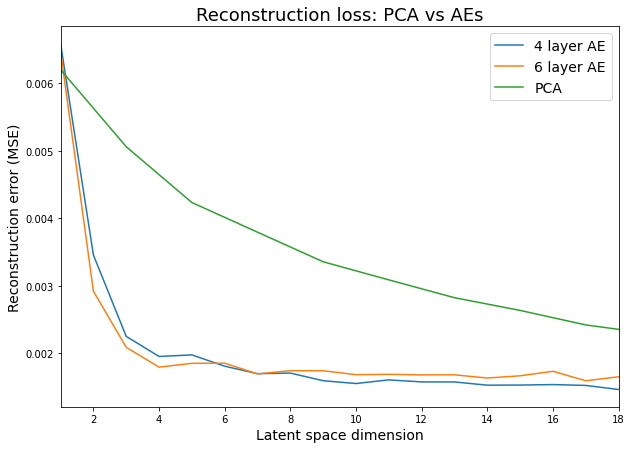

In [29]:
fig, ax = plt.subplots(figsize = (10, 7))
ax.plot(autoenc_simple_fineg["dim"], autoenc_simple_fineg["loss"], label = "4 layer AE")
ax.plot(autoenc_6layer_fineg ["dim"], autoenc_6layer_fineg ["loss"], label = "6 layer AE" )
ax.plot( np.array(np.arange(1, 20, 2)), pca_loss[:len(np.array(np.arange(1, 20, 2)))] , label = "PCA")
ax.set_xlabel("Latent space dimension", fontsize = 14)
ax.set_ylabel("Reconstruction error (MSE)", fontsize = 14)
ax.set(xlim = (1,18) )
ax.set_title("Reconstruction loss: PCA vs AEs", fontsize = 18)
ax.legend(fontsize = 14);

# PCA

In [30]:
pca_errors_means = np.abs(pca_errors).mean(axis = 1)
pca_errors_means_std = (np.abs(pca_errors_means) - pca_errors_means.mean())/pca_errors_means.std() 

In [31]:
import statsmodels.api as sm
import numpy as np

Y = pca_errors_means_std
X = phys_val_std
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.params

array([-8.46111375e-16,  1.64547869e-01,  3.25089993e-02, -3.15367863e-01,
        2.63379222e-01])

In [32]:
# model = sm.OLS(y, X)
# results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.229
Model:                            OLS   Adj. R-squared:                  0.222
Method:                 Least Squares   F-statistic:                     31.55
Date:                Tue, 13 Jul 2021   Prob (F-statistic):           5.02e-23
Time:                        18:30:39   Log-Likelihood:                -554.24
No. Observations:                 430   AIC:                             1118.
Df Residuals:                     425   BIC:                             1139.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8.461e-16      0.043  -1.99e-14      1.0

In [33]:
coefs_array = np.empty(shape = (phys_val_std.shape[1] + 1, val_df_pooled_rescaled.shape[1]))
pvals_array = np.empty(shape = (phys_val_std.shape[1] + 1, val_df_pooled_rescaled.shape[1]))
rsquared_array = np.empty(shape = val_df_pooled_rescaled.shape[1])
std_array = np.empty(shape = (phys_val_std.shape[1] + 1, val_df_pooled_rescaled.shape[1]))

for feature_num in np.arange(0, val_df_pooled_rescaled.shape[1]):
    
    feature = pca_errors[:, feature_num]
    
    feature_std = ( feature - feature.mean() )/ feature.std()
    X = phys_val_std
    X = sm.add_constant(X)
    
    Y = feature_std
    model = sm.OLS(Y,X)
    results = model.fit()
    
    coefs_array[:, feature_num] = results.params
    pvals_array[:, feature_num] = results.pvalues
    std_array[:, feature_num] = results.bse
    rsquared_array[feature_num] = results.rsquared

In [34]:
def numpy_rolling_mean(np_array, window, min_periods = None, index = None):
    '''
    Return a rolling average of a given numpy array. The arguments window and min_periods specify how 
    to construct the rolling windows.
    '''
    df_series = pd.DataFrame(np_array)
    df_series.set_index(index, inplace = True)
    return( df_series.rolling(window, min_periods, center = True).mean() )
    

In [35]:
def plot_coefs_vs_wavelength(coefs, window, min_periods = None, title = None, xticks = None,
                            color = None, color_ma = None, y_lim = [None, None]):
    fig, ax = plt.subplots(figsize = (18, 10))
    ax.plot(xticks, coefs, linewidth=0.1, color = color )
    ax.tick_params(labelsize = 18)
#     print(numpy_rolling_mean(coefs, window, min_periods, xticks))
    ax.plot(numpy_rolling_mean(coefs, window, min_periods, xticks), 
            linewidth=0.8, 
            color = color_ma );
#     ax.set_xticks(pooled_wavelengths)
    ax.set_ylim(y_lim)
    
    if title: ax.set_title(title, fontsize = 20);
    return()

virial_rad
stellar_rad
impact
disc


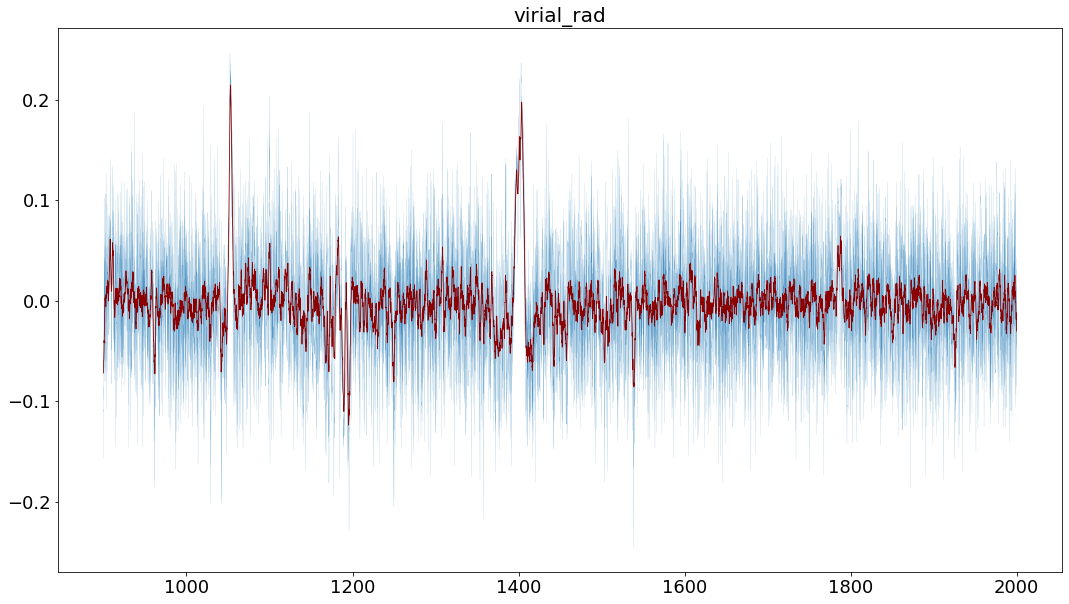

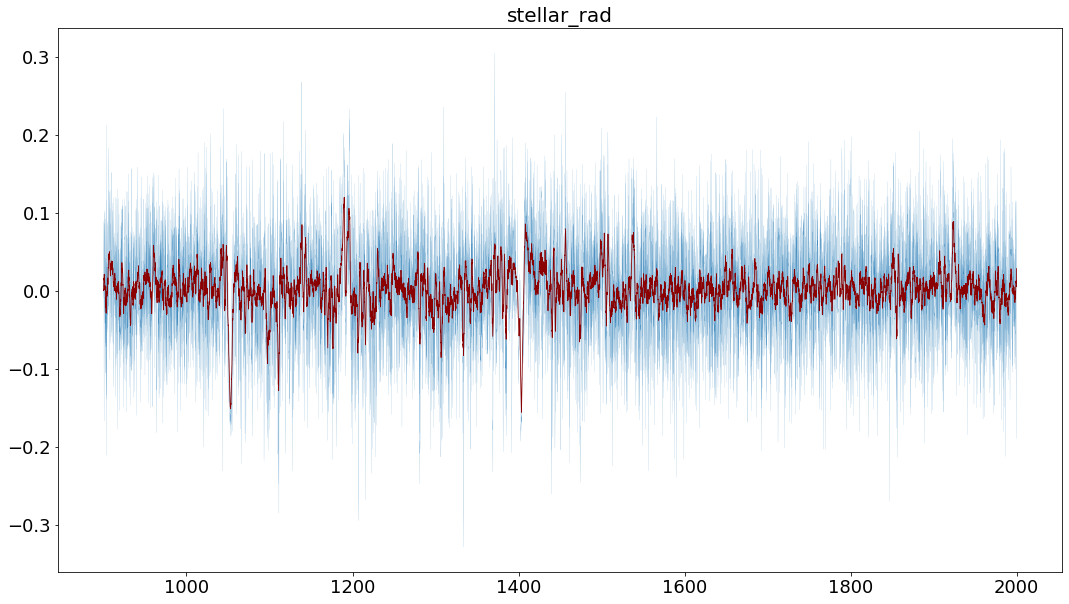

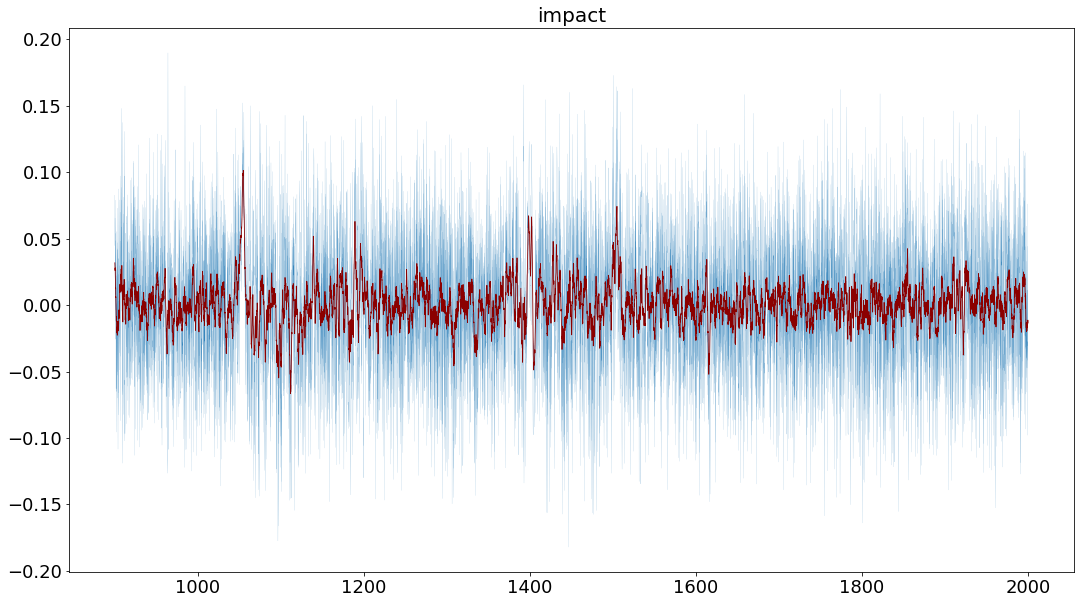

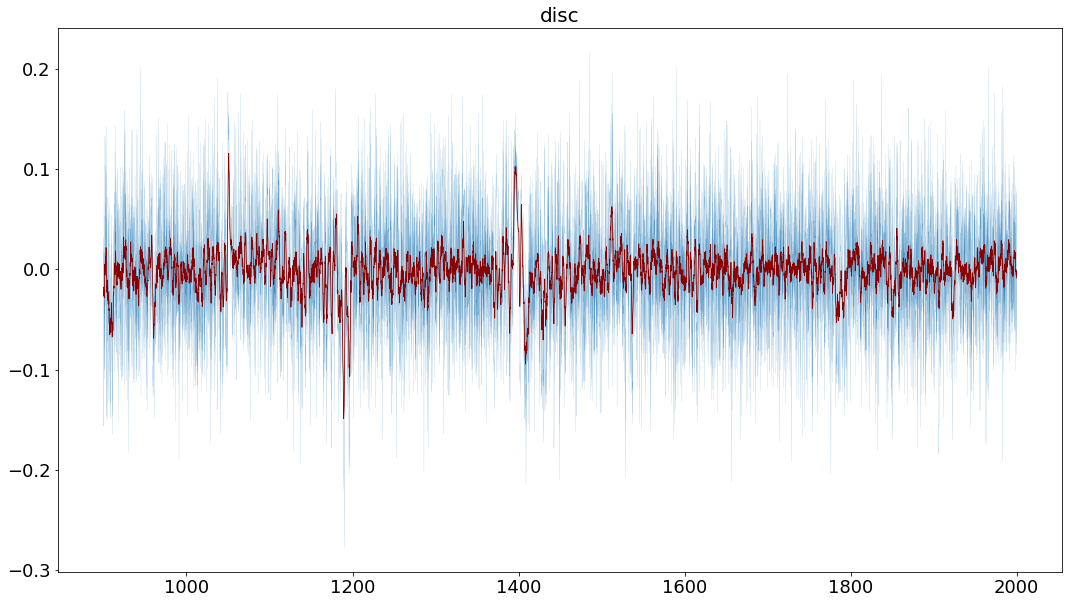

In [36]:
for i in np.arange(0, 4):

    print(phys_val.columns[i])
#     plot_coefs_vs_wavelength( np.abs(coefs_array[i+1,:])/(std_array[i+1,:]), 20, 10, title = phys_val.columns[i], 
#                              xticks = pooled_wavelengths, color_ma = "darkred", y_lim = [0, 4]) 
    plot_coefs_vs_wavelength( (coefs_array[i+1,:]), 20, 10, title = phys_val.columns[i], 
                             xticks = data_dict["wavelengths"], color_ma = "darkred") 

virial_rad


()

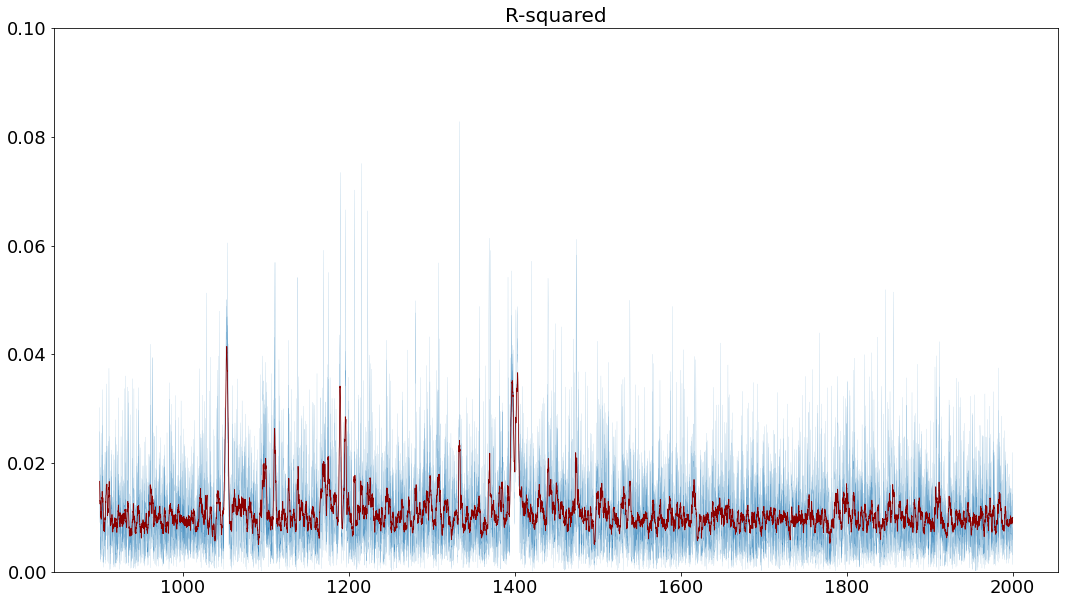

In [37]:
i = 0
print(phys_val.columns[i])
plot_coefs_vs_wavelength( rsquared_array, 20, 10, title = "R-squared", xticks = data_dict["wavelengths"],
                        color_ma = "darkred", y_lim = [0, 0.1]) 

In [38]:
# i = 1
# print(phys_val.columns[i])
# plot_coefs_vs_wavelength( (coefs_array[i+1,:])/std_array[i+1,:], 20, 10, title = "Stellar radius", xticks = pooled_wavelengths,
#                         color_ma = "darkred") 

# Autoencoder

In [39]:
autoenc_errors_means = np.abs(autoenc_errors).mean(axis = 1)
autoenc_errors_means_std = (np.abs(autoenc_errors_means) - autoenc_errors_means.mean())/autoenc_errors_means.std() 

In [40]:
import statsmodels.api as sm
import numpy as np
duncan_prestige = sm.datasets.get_rdataset("Duncan", "carData")
Y = autoenc_errors_means_std
X = phys_val_std
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.params

const   -1.726050e-16
x1       1.951032e-01
x2       1.087934e-02
x3      -3.074160e-01
x4       2.850015e-01
dtype: float64

In [41]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.243
Model:                            OLS   Adj. R-squared:                  0.236
Method:                 Least Squares   F-statistic:                     34.06
Date:                Tue, 13 Jul 2021   Prob (F-statistic):           1.15e-24
Time:                        18:30:53   Log-Likelihood:                -549.86
No. Observations:                 430   AIC:                             1110.
Df Residuals:                     425   BIC:                             1130.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.726e-16      0.042  -4.09e-15      1.0

In [42]:
coefs_array_autoenc = np.empty(shape = (phys_val_std.shape[1] + 1, val_df_pooled_rescaled.shape[1]))
pvals_array_autoenc = np.empty(shape = (phys_val_std.shape[1] + 1, val_df_pooled_rescaled.shape[1]))
std_array_autoenc = np.empty(shape = (phys_val_std.shape[1] + 1, val_df_pooled_rescaled.shape[1]))
rsquared_array_autoenc = np.empty(shape = val_df_pooled_rescaled.shape[1])

for feature_num in np.arange(0, val_df_pooled_rescaled.shape[1]):
    
    feature = autoenc_errors.iloc[:, feature_num]
    
    feature_std = ( feature - feature.mean() )/ feature.std()
    X = phys_val_std
    X = sm.add_constant(X)
    
    Y = feature_std
    model = sm.OLS(Y,X)
    results = model.fit()
    
    coefs_array_autoenc[:, feature_num] = results.params
    std_array_autoenc[:, feature_num] = results.bse
    pvals_array_autoenc[:, feature_num] = results.pvalues
    rsquared_array_autoenc[feature_num] = results.rsquared

In [43]:
#     X = sm.add_constant(phys_val)
#     model = sm.OLS(Y,X)
#     results = model.fit()

virial_rad


()

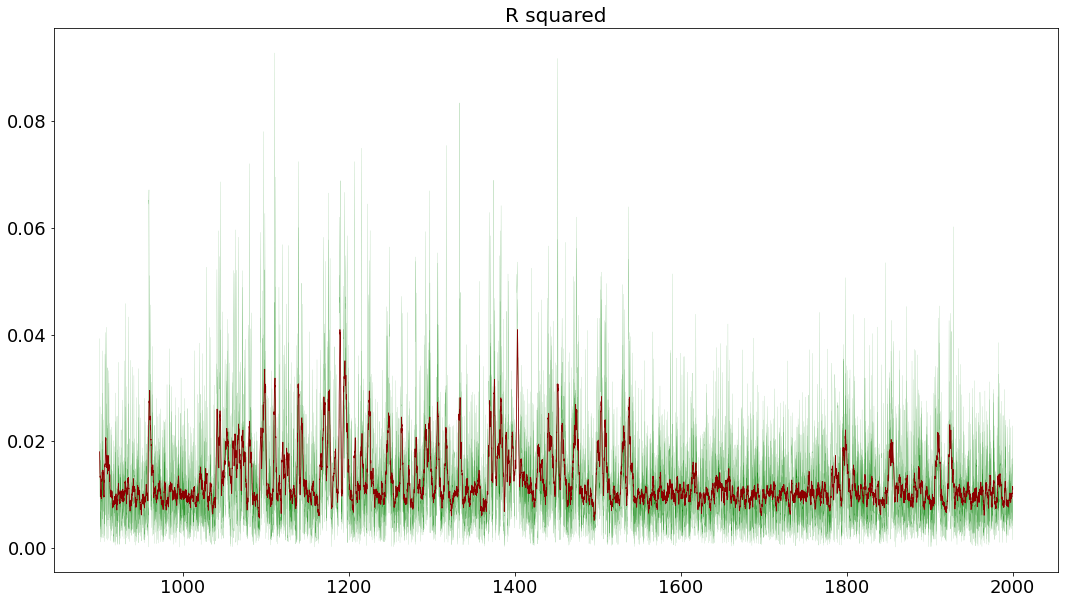

In [44]:
i = 0
print(phys_val.columns[i])
plot_coefs_vs_wavelength( rsquared_array_autoenc, 20, 10, title = "R squared", xticks = data_dict["wavelengths"],
                        color = "green", color_ma = "darkred") 

virial_rad
stellar_rad
impact
disc


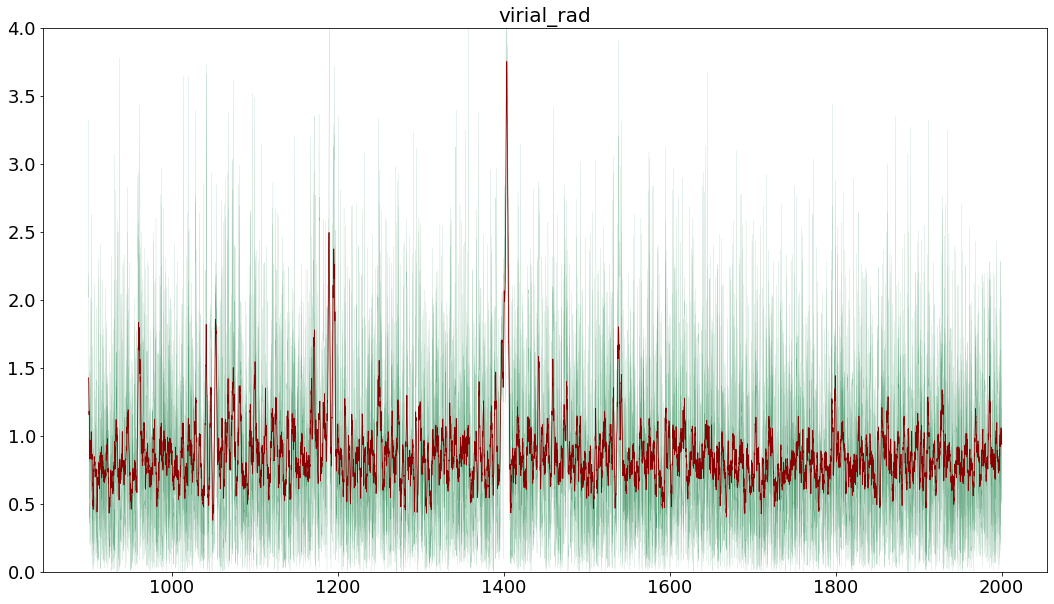

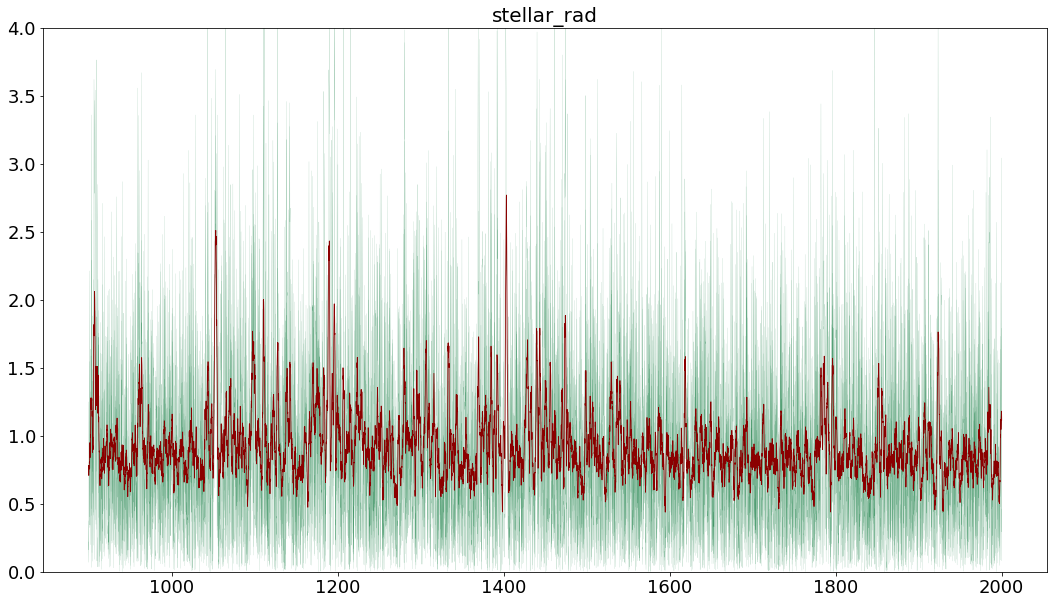

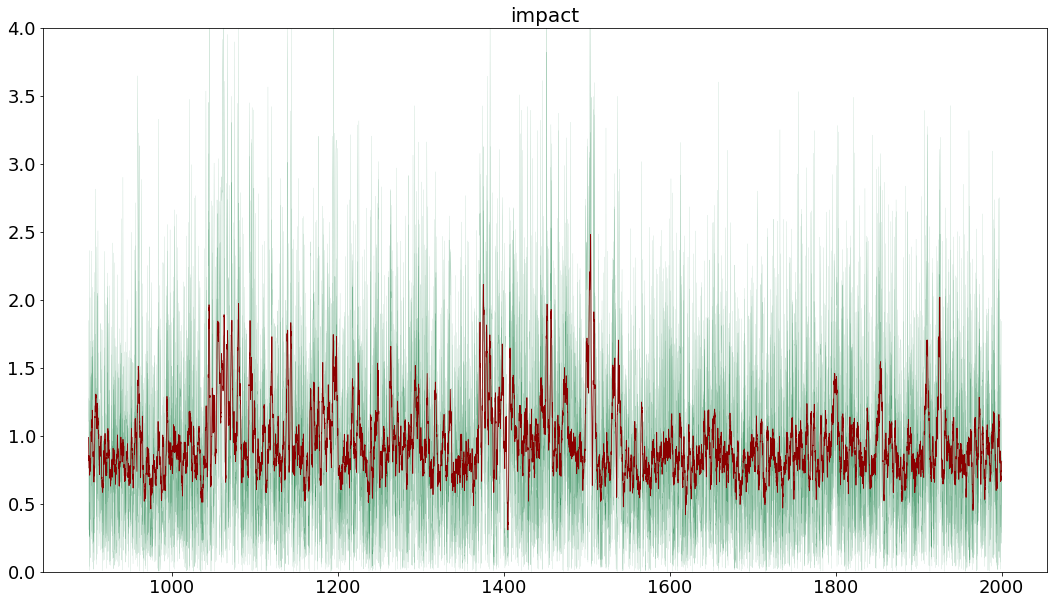

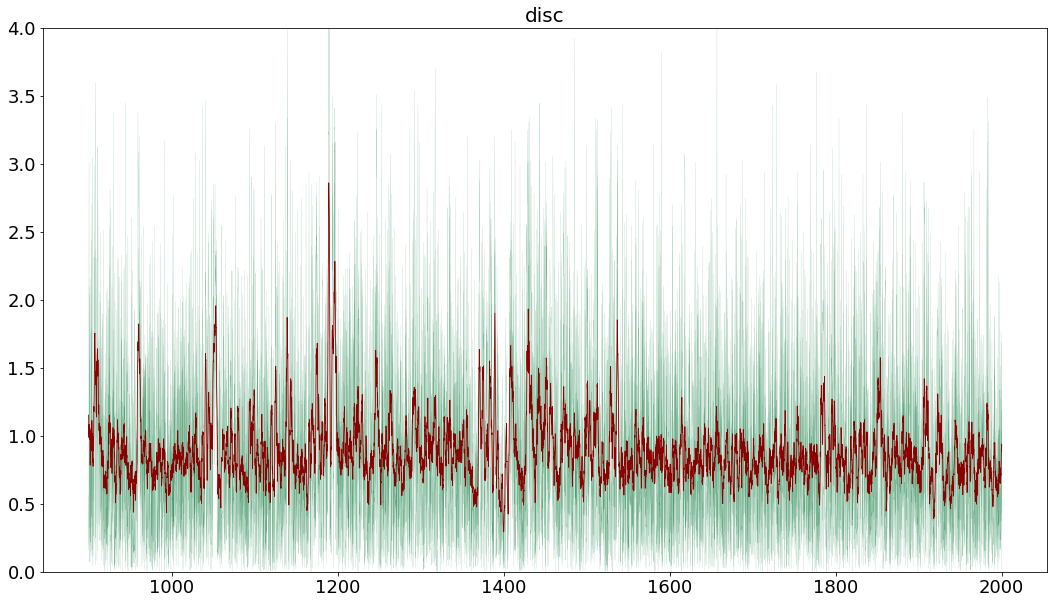

In [45]:
for i in np.arange(0, 4):

    print(phys_val.columns[i])
    plot_coefs_vs_wavelength( np.abs(coefs_array_autoenc[i+1,:])/std_array_autoenc[i+1,:], 20, 10, title = phys_val.columns[i], 
                             xticks = data_dict["wavelengths"], color = "seagreen", color_ma = "darkred", y_lim = [0, 4]) 
#     plot_coefs_vs_wavelength( (coefs_array_autoenc[i+1,:]), 20, 10, title = phys_val.columns[i], 
#                              xticks = data_dict["wavelengths"], color = "seagreen", color_ma = "darkred") 

In [46]:
coefs_array_features = np.empty(shape = (phys_val_std.shape[1] + 1, val_df_pooled_rescaled.shape[1]))
pvals_array_features = np.empty(shape = (phys_val_std.shape[1] + 1, val_df_pooled_rescaled.shape[1]))
std_array_features = np.empty(shape = (phys_val_std.shape[1] + 1, val_df_pooled_rescaled.shape[1]))
rsquared_array_features = np.empty(shape = val_df_pooled_rescaled.shape[1])

for feature_num in np.arange(0, val_df_pooled_rescaled.shape[1]):
    
    feature = val_df_pooled_rescaled.iloc[:, feature_num]
    
    feature_std = ( feature - feature.mean() )/ feature.std()
    X = phys_val_std
    X = sm.add_constant(X)
    
    Y = feature_std
    model = sm.OLS(Y,X)
    results = model.fit()
    
    coefs_array_features[:, feature_num] = results.params
    pvals_array_features[:, feature_num] = results.pvalues
    rsquared_array_features[feature_num] = results.rsquared
    std_array_features[:, feature_num] = results.bse

virial_rad
stellar_rad
impact
disc


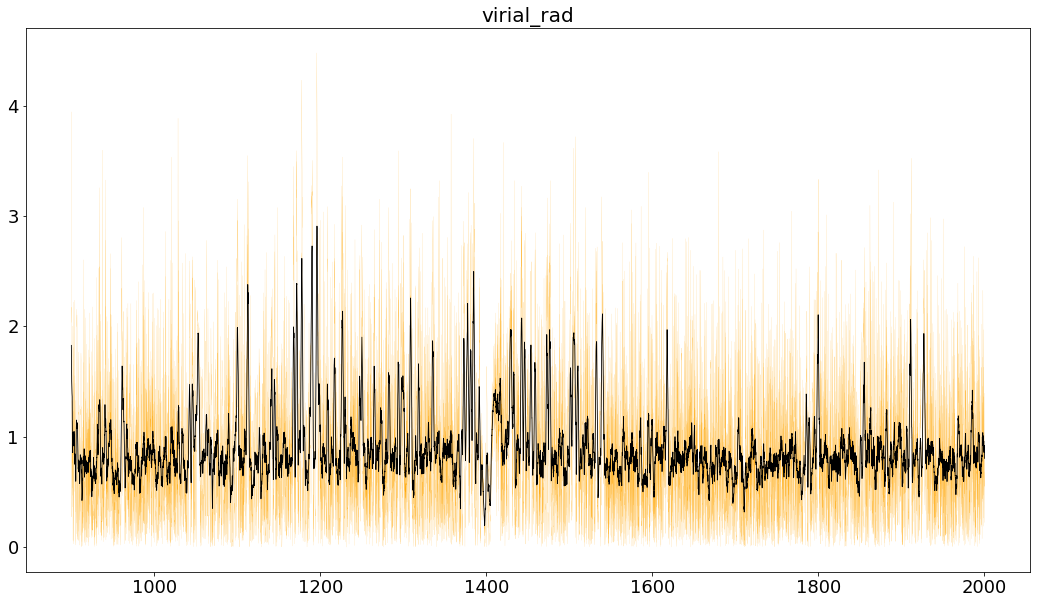

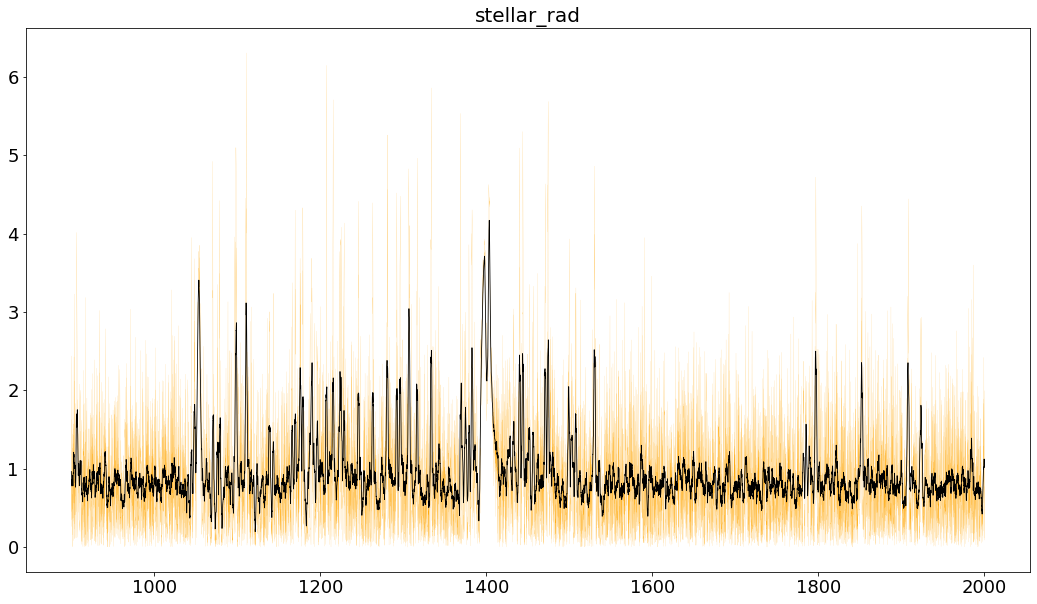

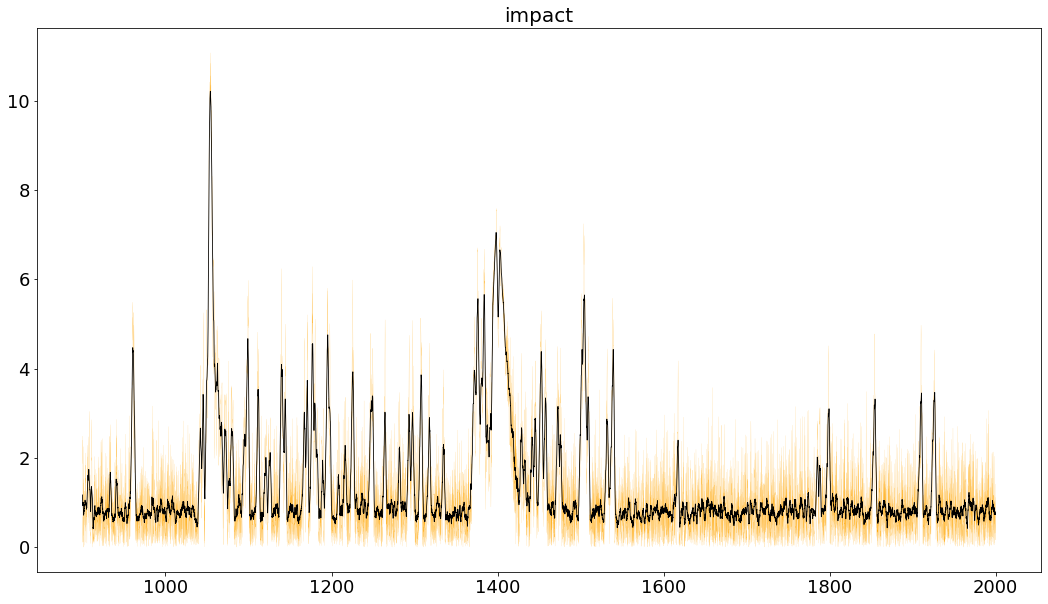

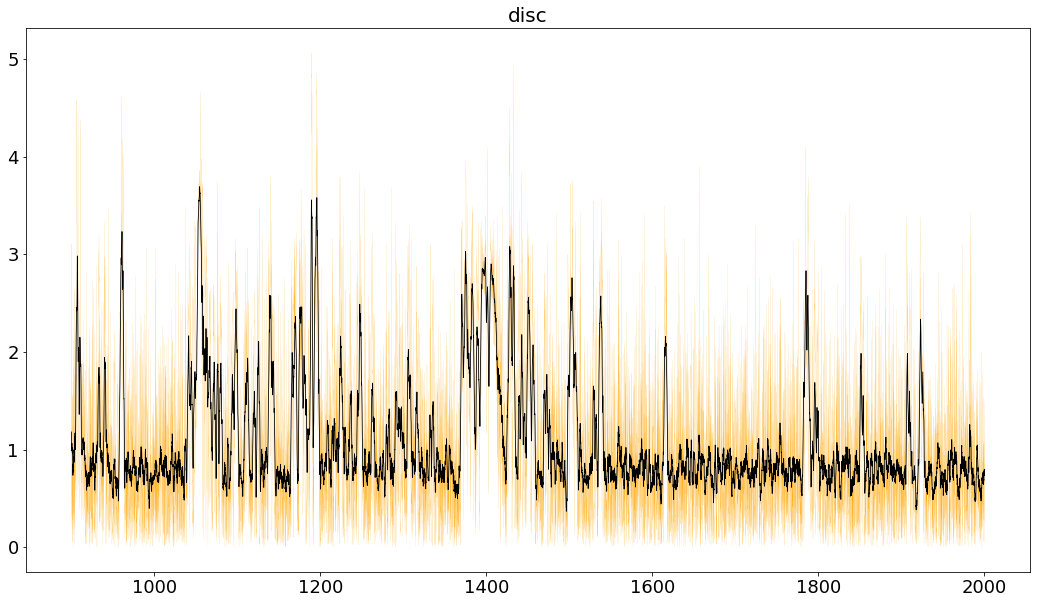

In [47]:
for i in np.arange(0, 4):

    print(phys_val.columns[i])
    plot_coefs_vs_wavelength( np.abs(coefs_array_features[i+1,:])/(std_array_features[i+1,:]), 20, 10, title = phys_val.columns[i], 
                             xticks = data_dict["wavelengths"], color = "orange", color_ma = "black") 
#     plot_coefs_vs_wavelength( (coefs_array_features[i+1,:]), 20, 10, title = phys_val.columns[i], 
#                              xticks = data_dict["wavelengths"], color = "orange", color_ma = "black") 

In [48]:
def plot_coefs_vs_wavelength(coefs, window, min_periods = None, title = None, xticks = None,
                            color = None, color_ma = None, y_lim = [None, None]):
    fig, ax = plt.subplots(figsize = (18, 10))
    ax.plot(xticks, coefs, linewidth=0.1, color = color )
    ax.tick_params(labelsize = 18)
#     print(numpy_rolling_mean(coefs, window, min_periods, xticks))
    ax.plot(numpy_rolling_mean(coefs, window, min_periods, xticks), 
            linewidth=0.8, 
            color = color_ma );
#     ax.set_xticks(pooled_wavelengths)
    ax.set_ylim(y_lim)
    
    if title: ax.set_title(title, fontsize = 20);
    return()

Text(0, 0.5, 'PCA R-squared')

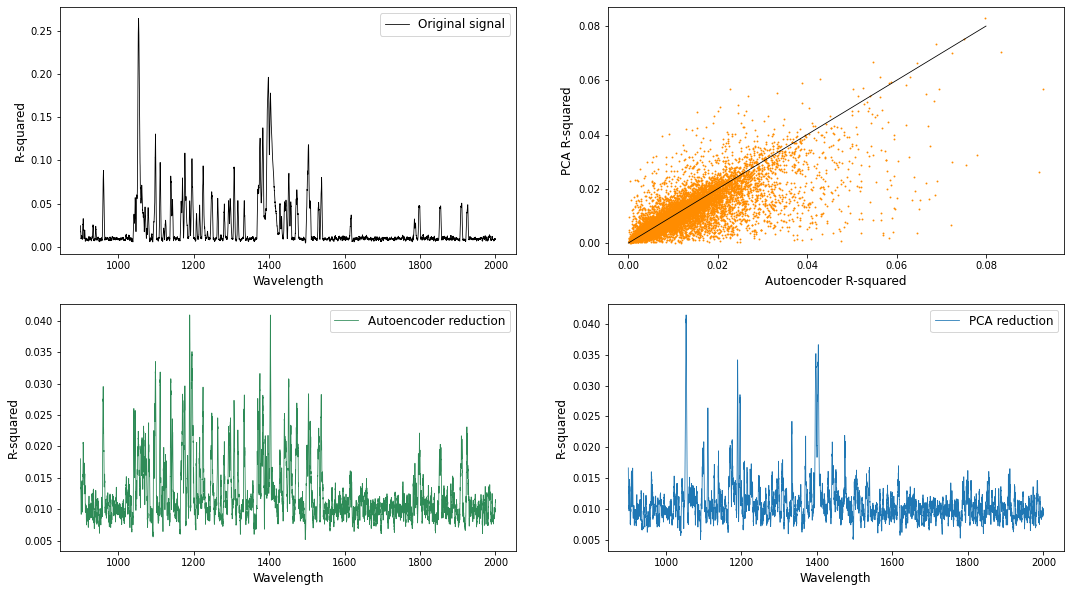

In [49]:
fig, ax = plt.subplots(2, 2, figsize = (18, 10))

ax[0, 0].plot(numpy_rolling_mean(rsquared_array_features, 20, 10, data_dict["wavelengths"]), 
        linewidth=0.8, 
        color = "black", label = "Original signal" );
ax[0, 0].set_ylabel("R-squared", fontsize = 12)
ax[0, 0].set_xlabel("Wavelength", fontsize = 12)
ax[0, 0].legend(fontsize = 12)

ax[1, 0].plot(numpy_rolling_mean(rsquared_array_autoenc, 20, 10, data_dict["wavelengths"]), 
        linewidth=0.8, 
        color = "seagreen", label = "Autoencoder reduction" );
ax[1, 0].set_ylabel("R-squared", fontsize = 12)
ax[1, 0].set_xlabel("Wavelength", fontsize = 12)
ax[1,0].legend(fontsize = 12)

ax[1, 1].plot(numpy_rolling_mean(rsquared_array, 20, 10, data_dict["wavelengths"]), 
        linewidth=0.8, label = "PCA reduction" );
ax[1, 1].set_ylabel("R-squared", fontsize = 12)
ax[1, 1].set_xlabel("Wavelength", fontsize = 12)
ax[1,1].legend(fontsize = 12)

ax[0, 1].scatter(numpy_rolling_mean(rsquared_array_autoenc, 1, 1, data_dict["wavelengths"]), 
          numpy_rolling_mean(rsquared_array, 1, 1, data_dict["wavelengths"]), s = 0.8, c = "darkorange")
ax[0, 1].plot([0, 0.08], [0,0.08], color = "black", linewidth = 0.8)
ax[0, 1].set_xlabel("Autoencoder R-squared", fontsize = 12)
ax[0, 1].set_ylabel("PCA R-squared", fontsize = 12)

virial_rad


()

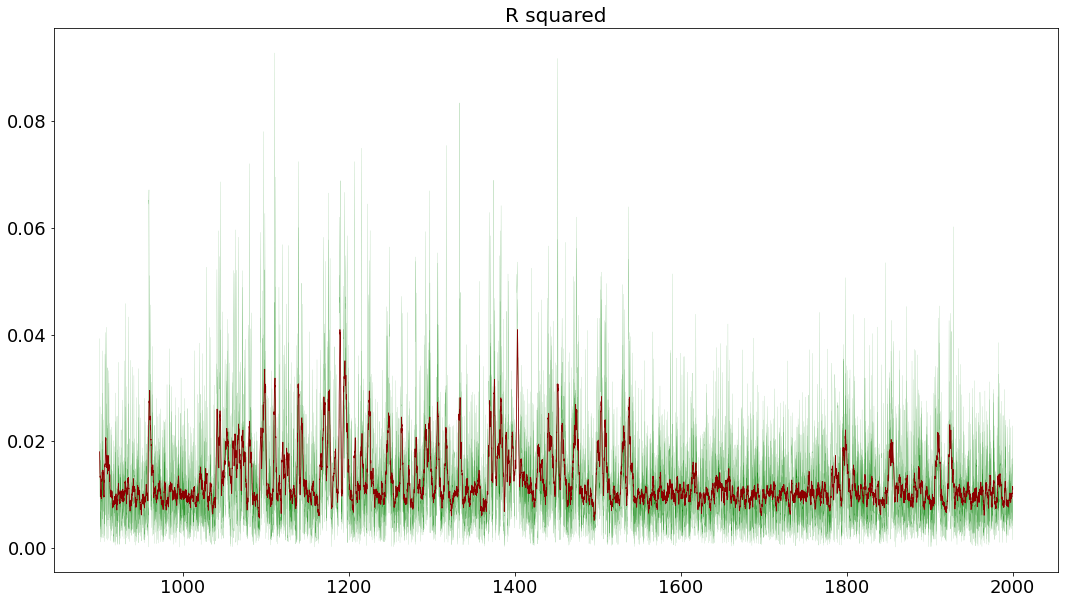

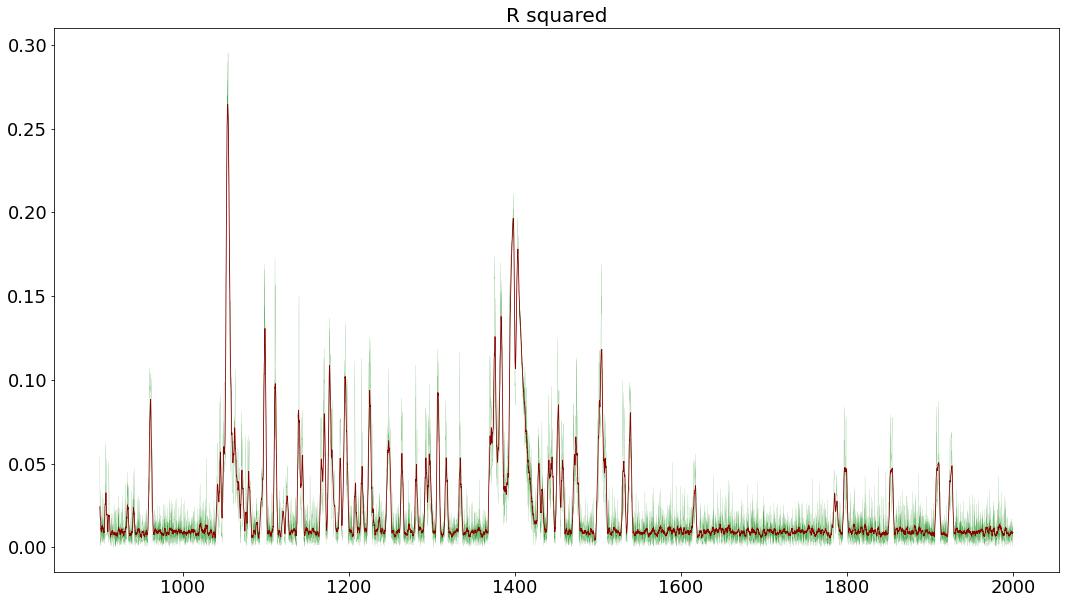

In [50]:
i = 0
print(phys_val.columns[i])
plot_coefs_vs_wavelength( rsquared_array_autoenc, 20, 10, title = "R squared", xticks = data_dict["wavelengths"],
                        color = "green", color_ma = "darkred") 
plot_coefs_vs_wavelength( rsquared_array_features, 20, 10, title = "R squared", xticks = data_dict["wavelengths"],
                        color = "green", color_ma = "darkred") 

# Is error related to total flux within a sample?

In [52]:
np.abs(autoenc_errors).shape

(430, 11001)

In [80]:

total_flux_per_sample = np.abs(val_df_pooled_rescaled-1).sum(axis = 1)
total_flux_per_wavelength = np.abs(val_df_pooled_rescaled-1).sum(axis = 0)

In [81]:
np.abs(autoenc_errors).sum(axis = 1)

0      174.553863
1      178.605140
2      180.710472
3      214.787611
4      213.230059
          ...    
425    197.582523
426    196.559173
427    189.403624
428    200.449531
429    174.365321
Length: 430, dtype: float64

Text(0, 0.5, 'Sum of absolute errors \n (log scale)')

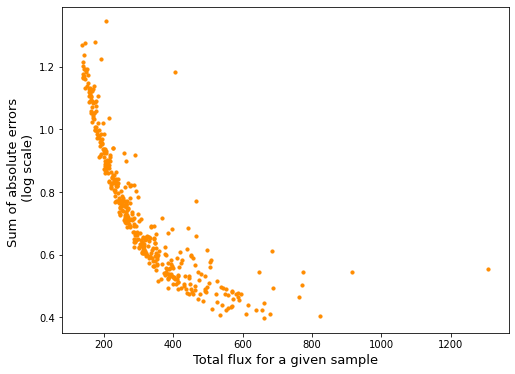

In [114]:
fix, ax = plt.subplots(figsize = (8, 6))
ax.scatter(total_flux_per_sample, np.abs(autoenc_errors).sum(axis = 1)/total_flux_per_sample, s = 10, color = "darkorange")
ax.set_xlabel("Total flux for a given sample", fontsize = 13)
ax.set_ylabel("Sum of absolute errors \n (log scale)" , fontsize = 13)
# ax.set_yscale('log')
# ax.set_xscale('log')

Text(0, 0.5, 'Sum of absolute errors')

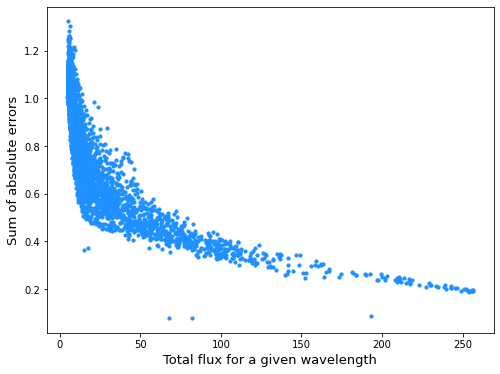

In [115]:
fix, ax = plt.subplots(figsize = (8, 6))
ax.scatter(total_flux_per_wavelength, np.abs(autoenc_errors).sum(axis = 0)/total_flux_per_wavelength, s = 10, color = "dodgerblue")
ax.set_xlabel("Total flux for a given wavelength", fontsize = 13)
ax.set_ylabel("Sum of absolute errors", fontsize = 13)
# ax.set_yscale('log')